In [26]:
from __future__ import division
%pylab inline
import seaborn as sns;sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = 19,14
sns.set_context('poster',font_scale=1.4)
import galsim as gs

Populating the interactive namespace from numpy and matplotlib


## Galaxy traces

In [2]:
cat = gs.COSMOSCatalog(use_real=False)

In [3]:
cat.getNObjects()

81520

In [ ]:
sigmas = []
for idx in range(cat.getNObjects()):
    galaxy = cat.makeGalaxy(idx)
    try:
        img = galaxy.drawImage(scale=0.03)
        moments = gs.hsm.FindAdaptiveMom(img)
        sigmas.append(moments.moments_sigma)
    except RuntimeError:
        pass

In [16]:
img.scale

0.03

In [5]:
len(sigmas)

50352

In [6]:
print('fraction of useable galaxies: {:.3f}'.format(len(sigmas)/cat.getNObjects()))

fraction of useable galaxies: 0.618


In [11]:
sigmas = np.array(sigmas)*0.03

In [12]:
np.mean(sigmas)

0.17948332971748532

In [13]:
traces = 2*sigmas**2

In [14]:
np.mean(traces)

0.091344517498137837

## PSF Trace:
- Use Kolmogorov profile for several realizations of the psf simulating a distribution similar to the one in page 48 of https://docushare.lsstcorp.org/docushare/dsweb/Get/LPM-17, add 10% to the size, draw them with some small pizel scale (0.02) and get moments and invert pixel scale.
- Use number from documentation. 

In [27]:
seeings = []
for i in range(10000):
    seeings.append(np.random.lognormal(mean=-0.5104, sigma=0.452)*1.1)

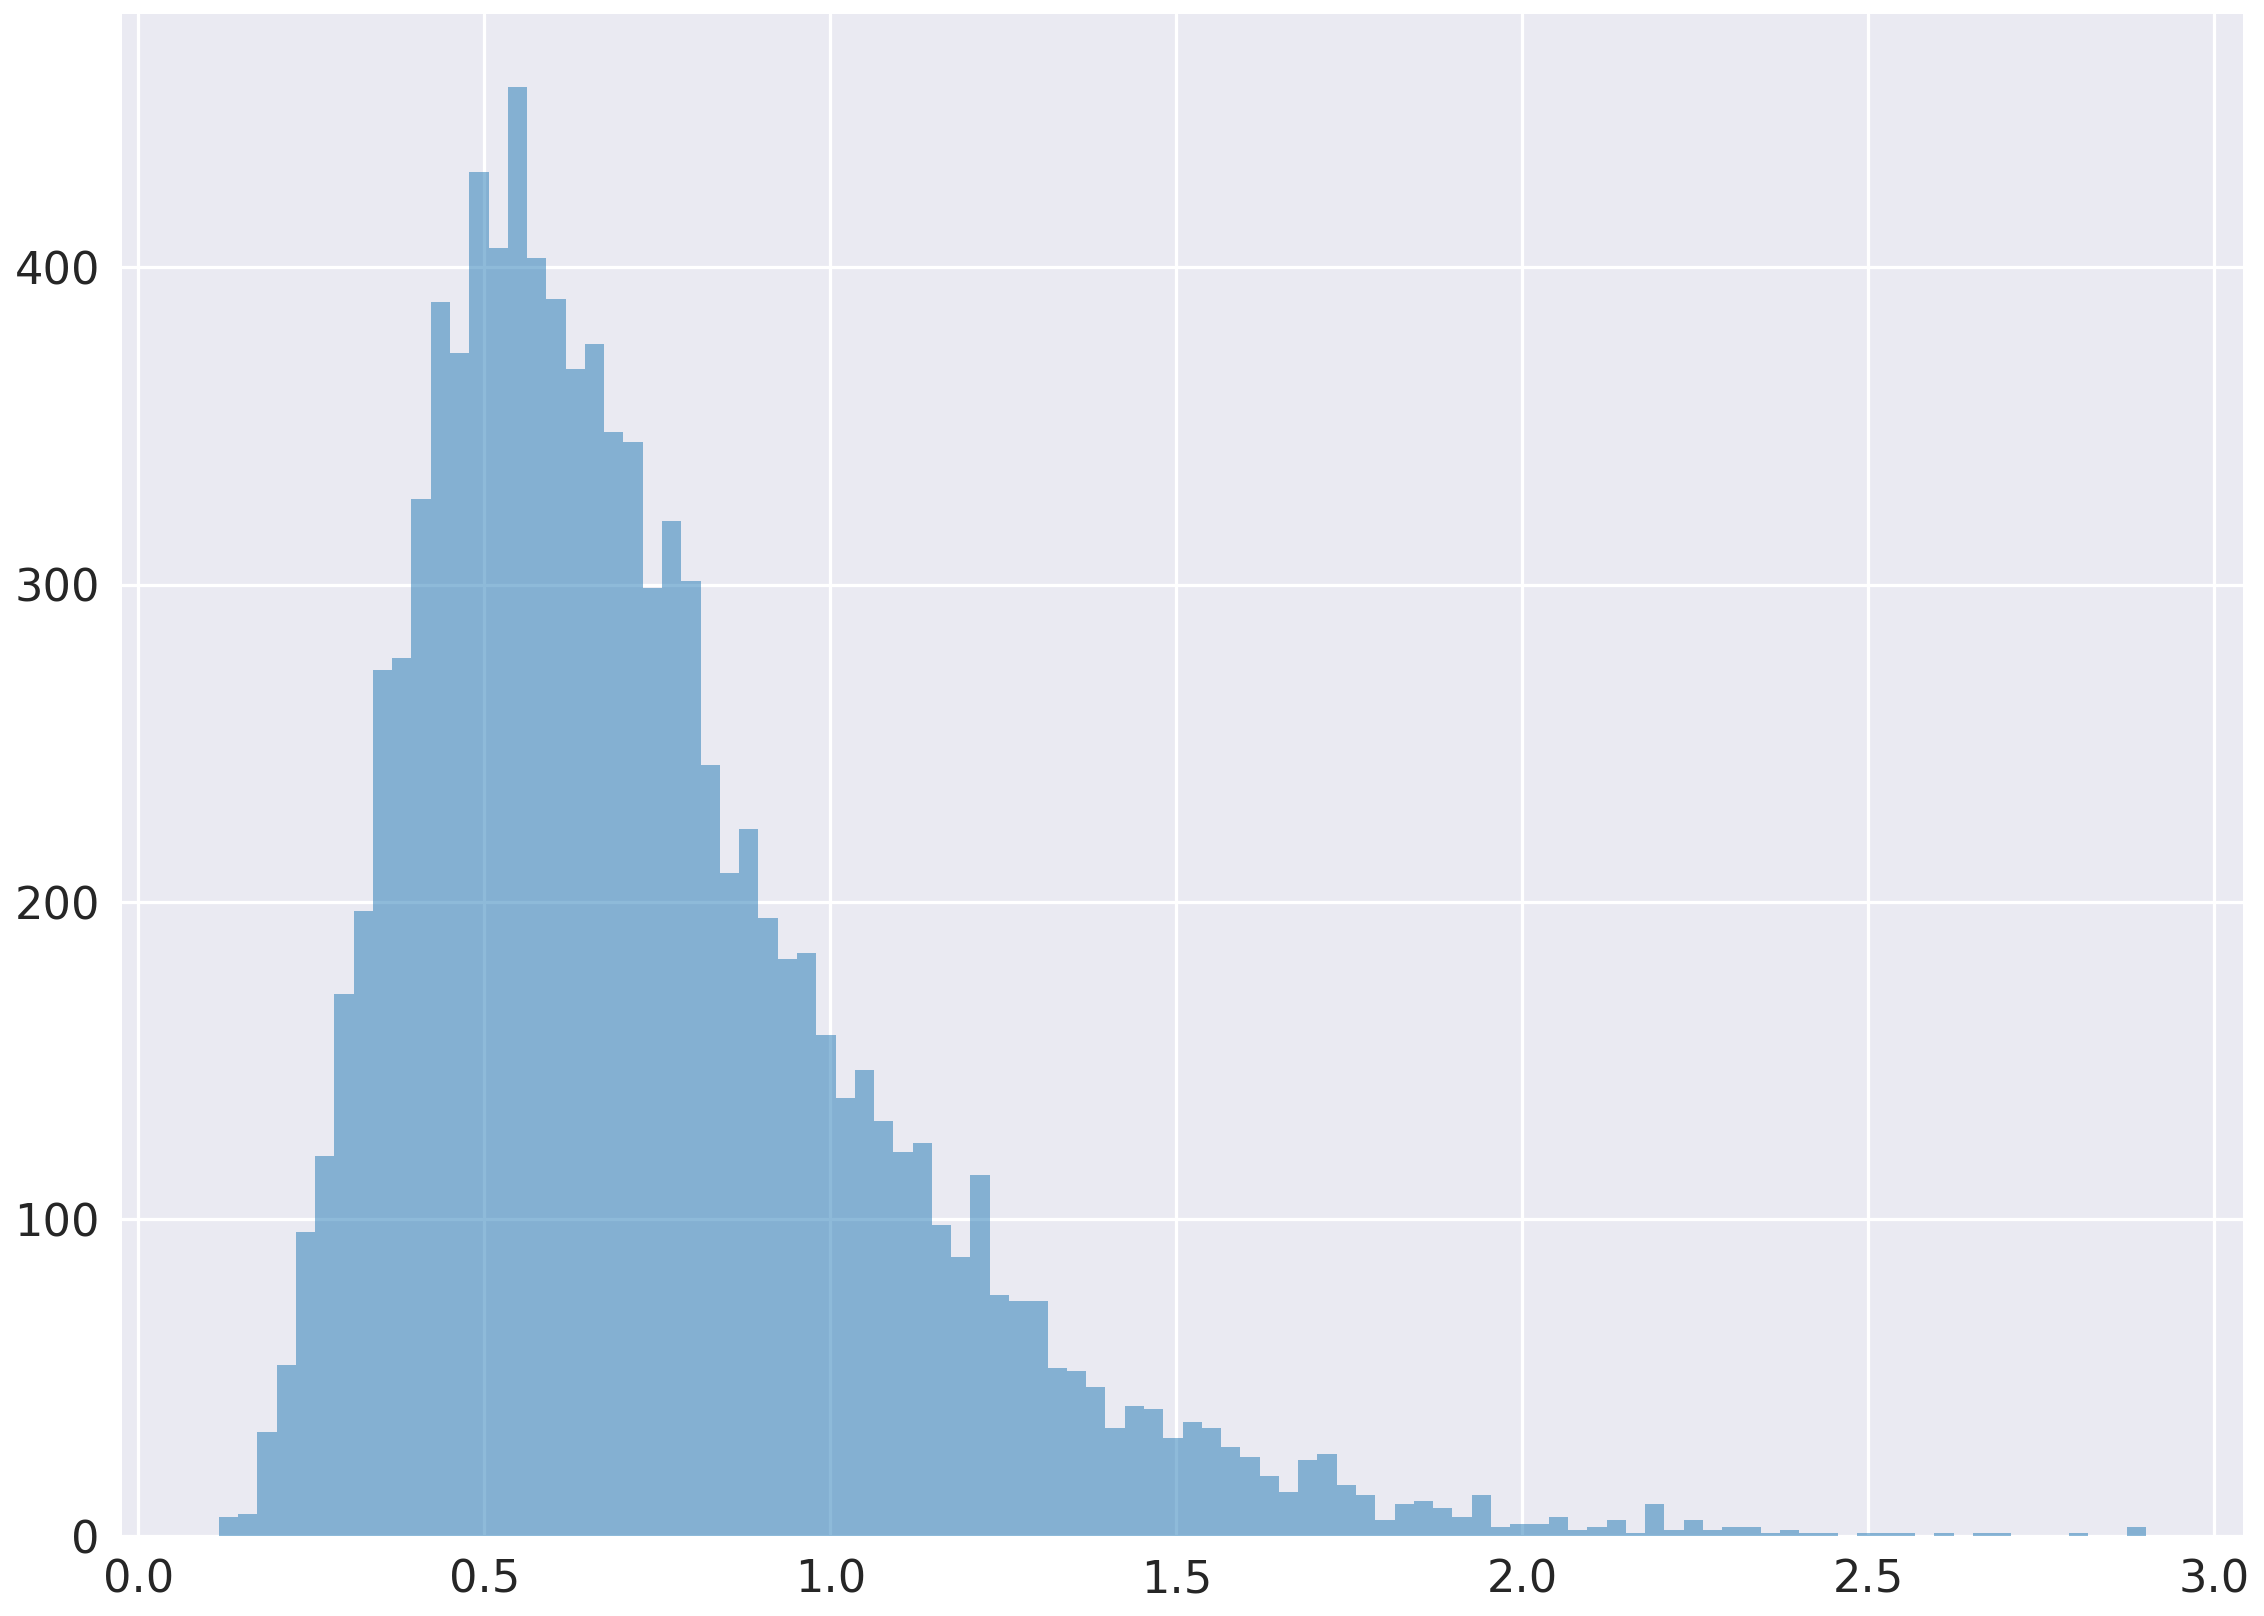

In [28]:
plt.hist(seeings, bins=100, alpha=0.5);

`seeings` is in units of FWHM, turn into units of standard deviations by drawing them as a Kolmogorov profile with small pixel-scale and then calculating the second moments, and then we can get the trace from $T = 2\sigma^2$ 

In [29]:
pixel_scale = 0.02
psf_sigmas = []
for fwhm in seeings:
    kol_profile = gs.Kolmogorov(fwhm=fwhm)
    img = kol_profile.drawImage(scale=pixel_scale)
    moms = gs.hsm.FindAdaptiveMom(img)
    psf_sigmas.append(moms.moments_sigma)

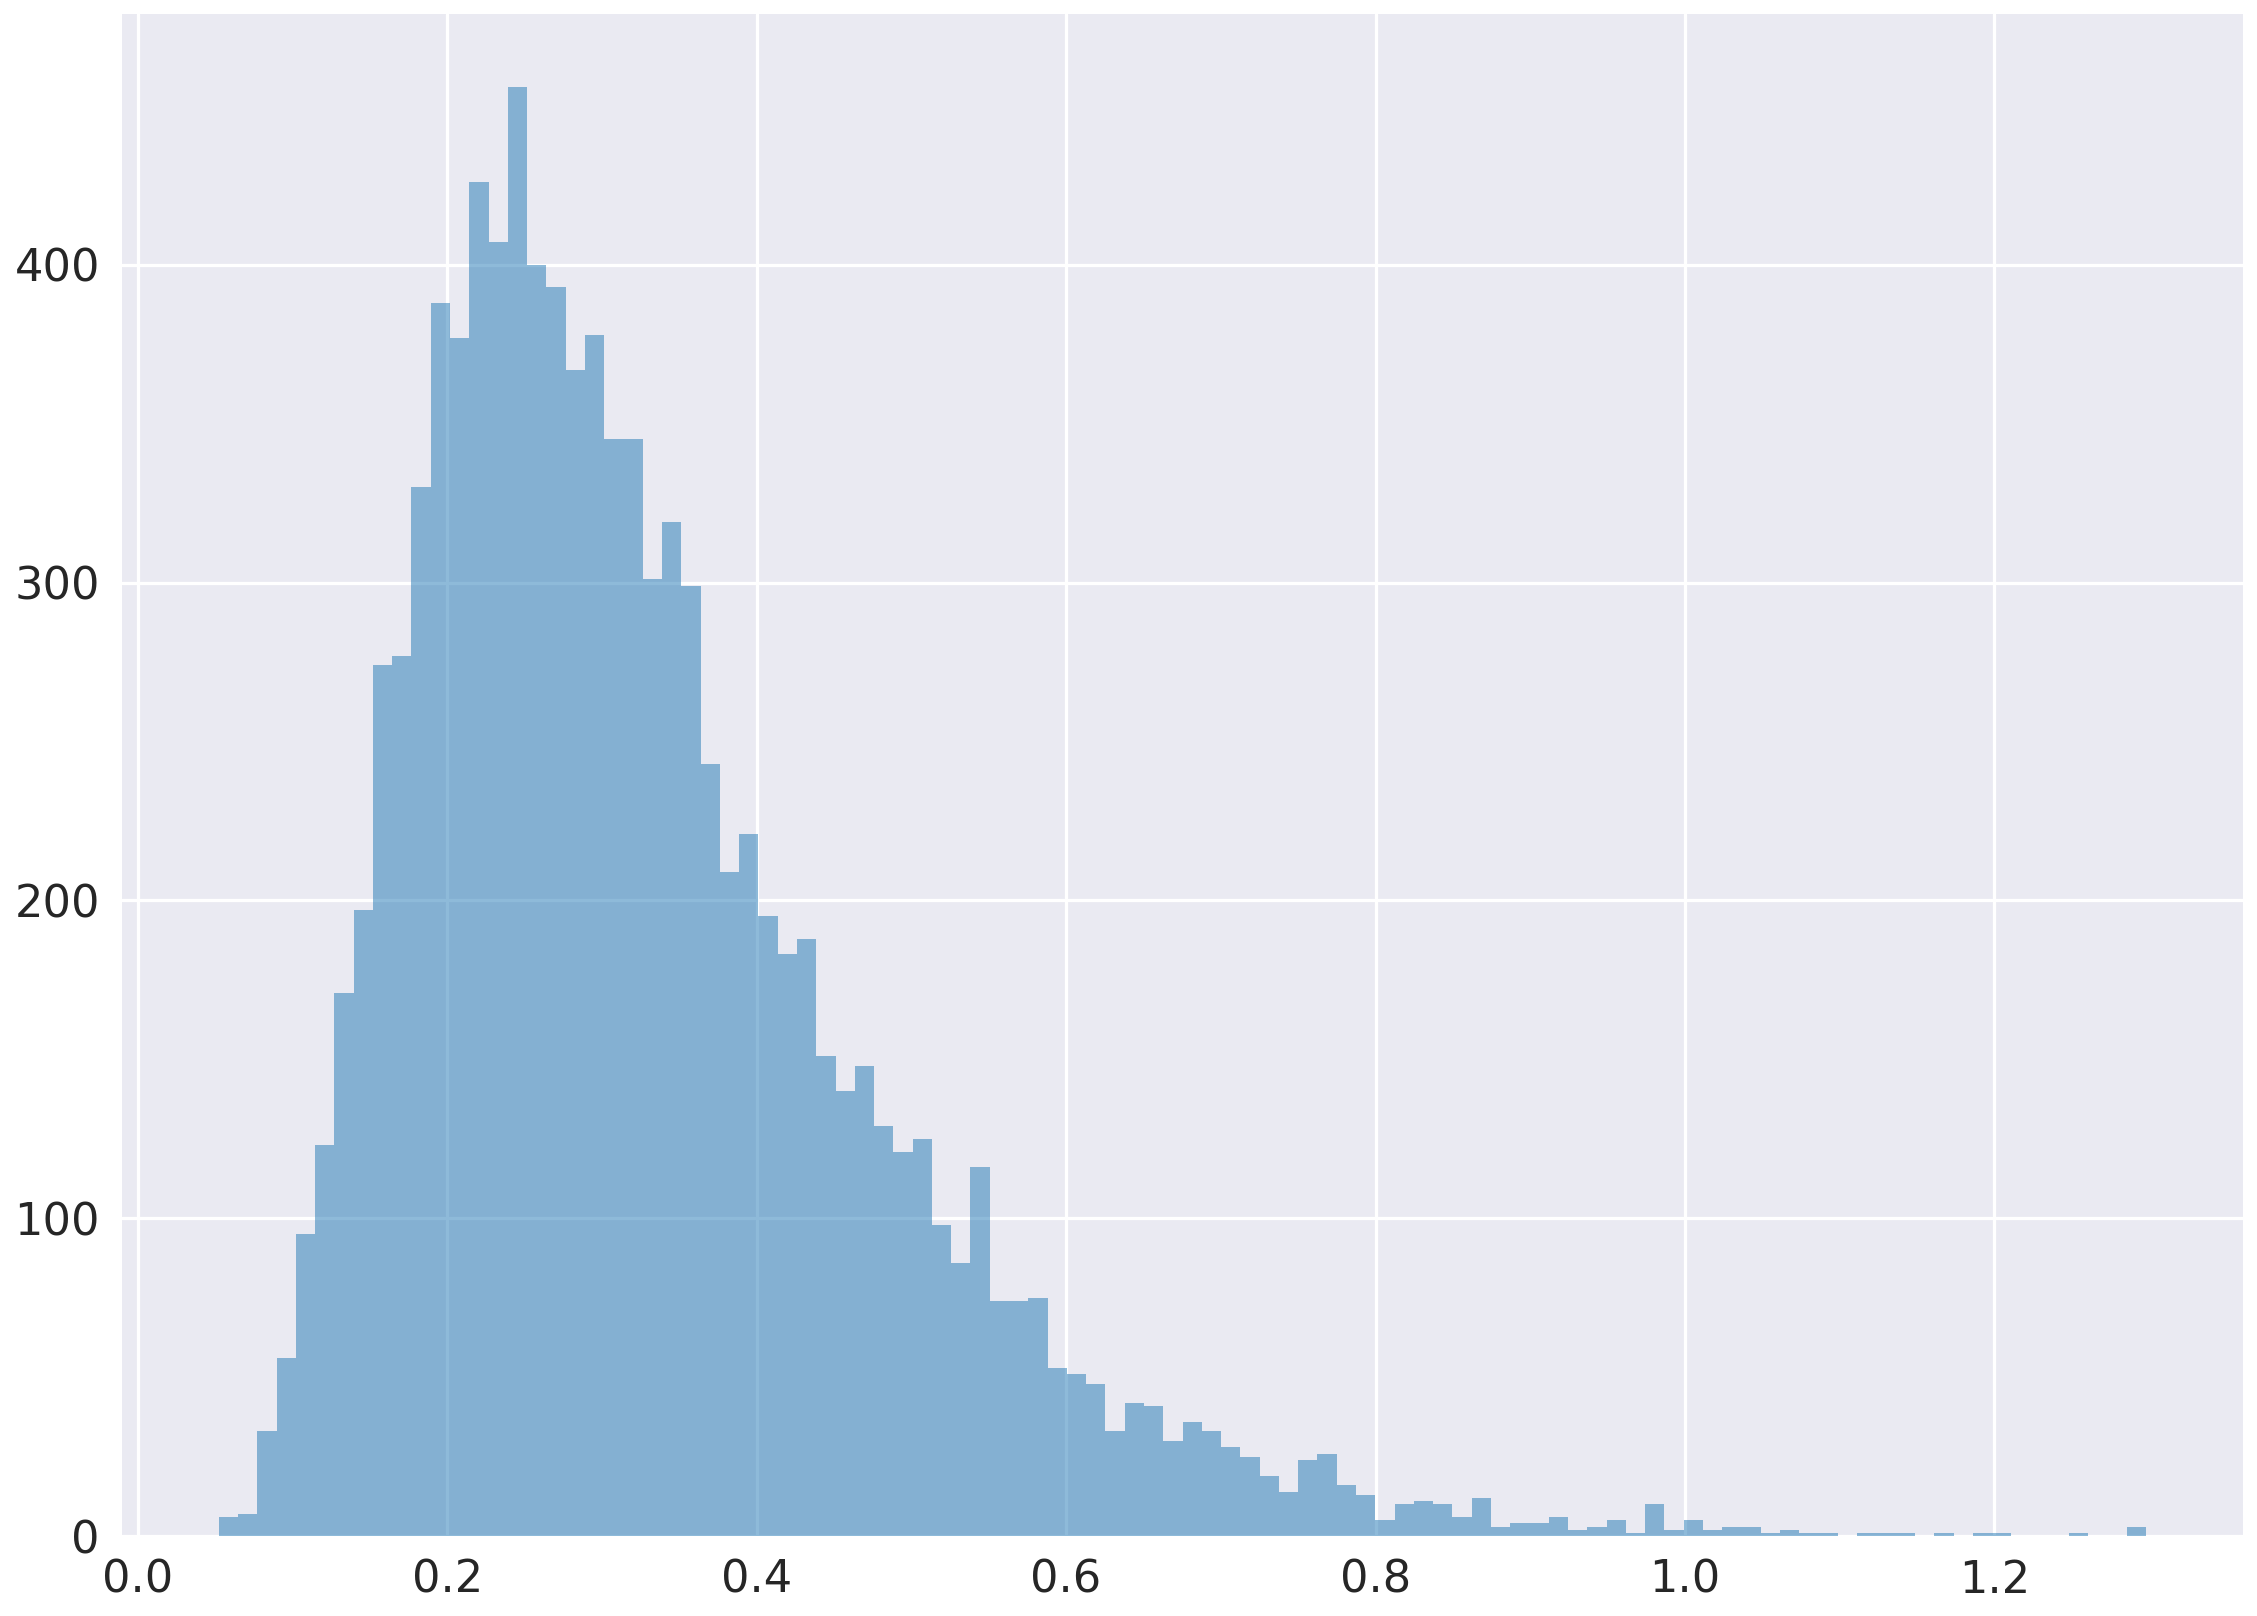

In [30]:
plt.hist(np.array(psf_sigmas)*0.02, bins=100, alpha=0.5);

In [31]:
np.mean(psf_sigmas)*pixel_scale

0.32880673581886294

In [32]:
seeings_traces = 2*(np.array(psf_sigmas)*pixel_scale)**2

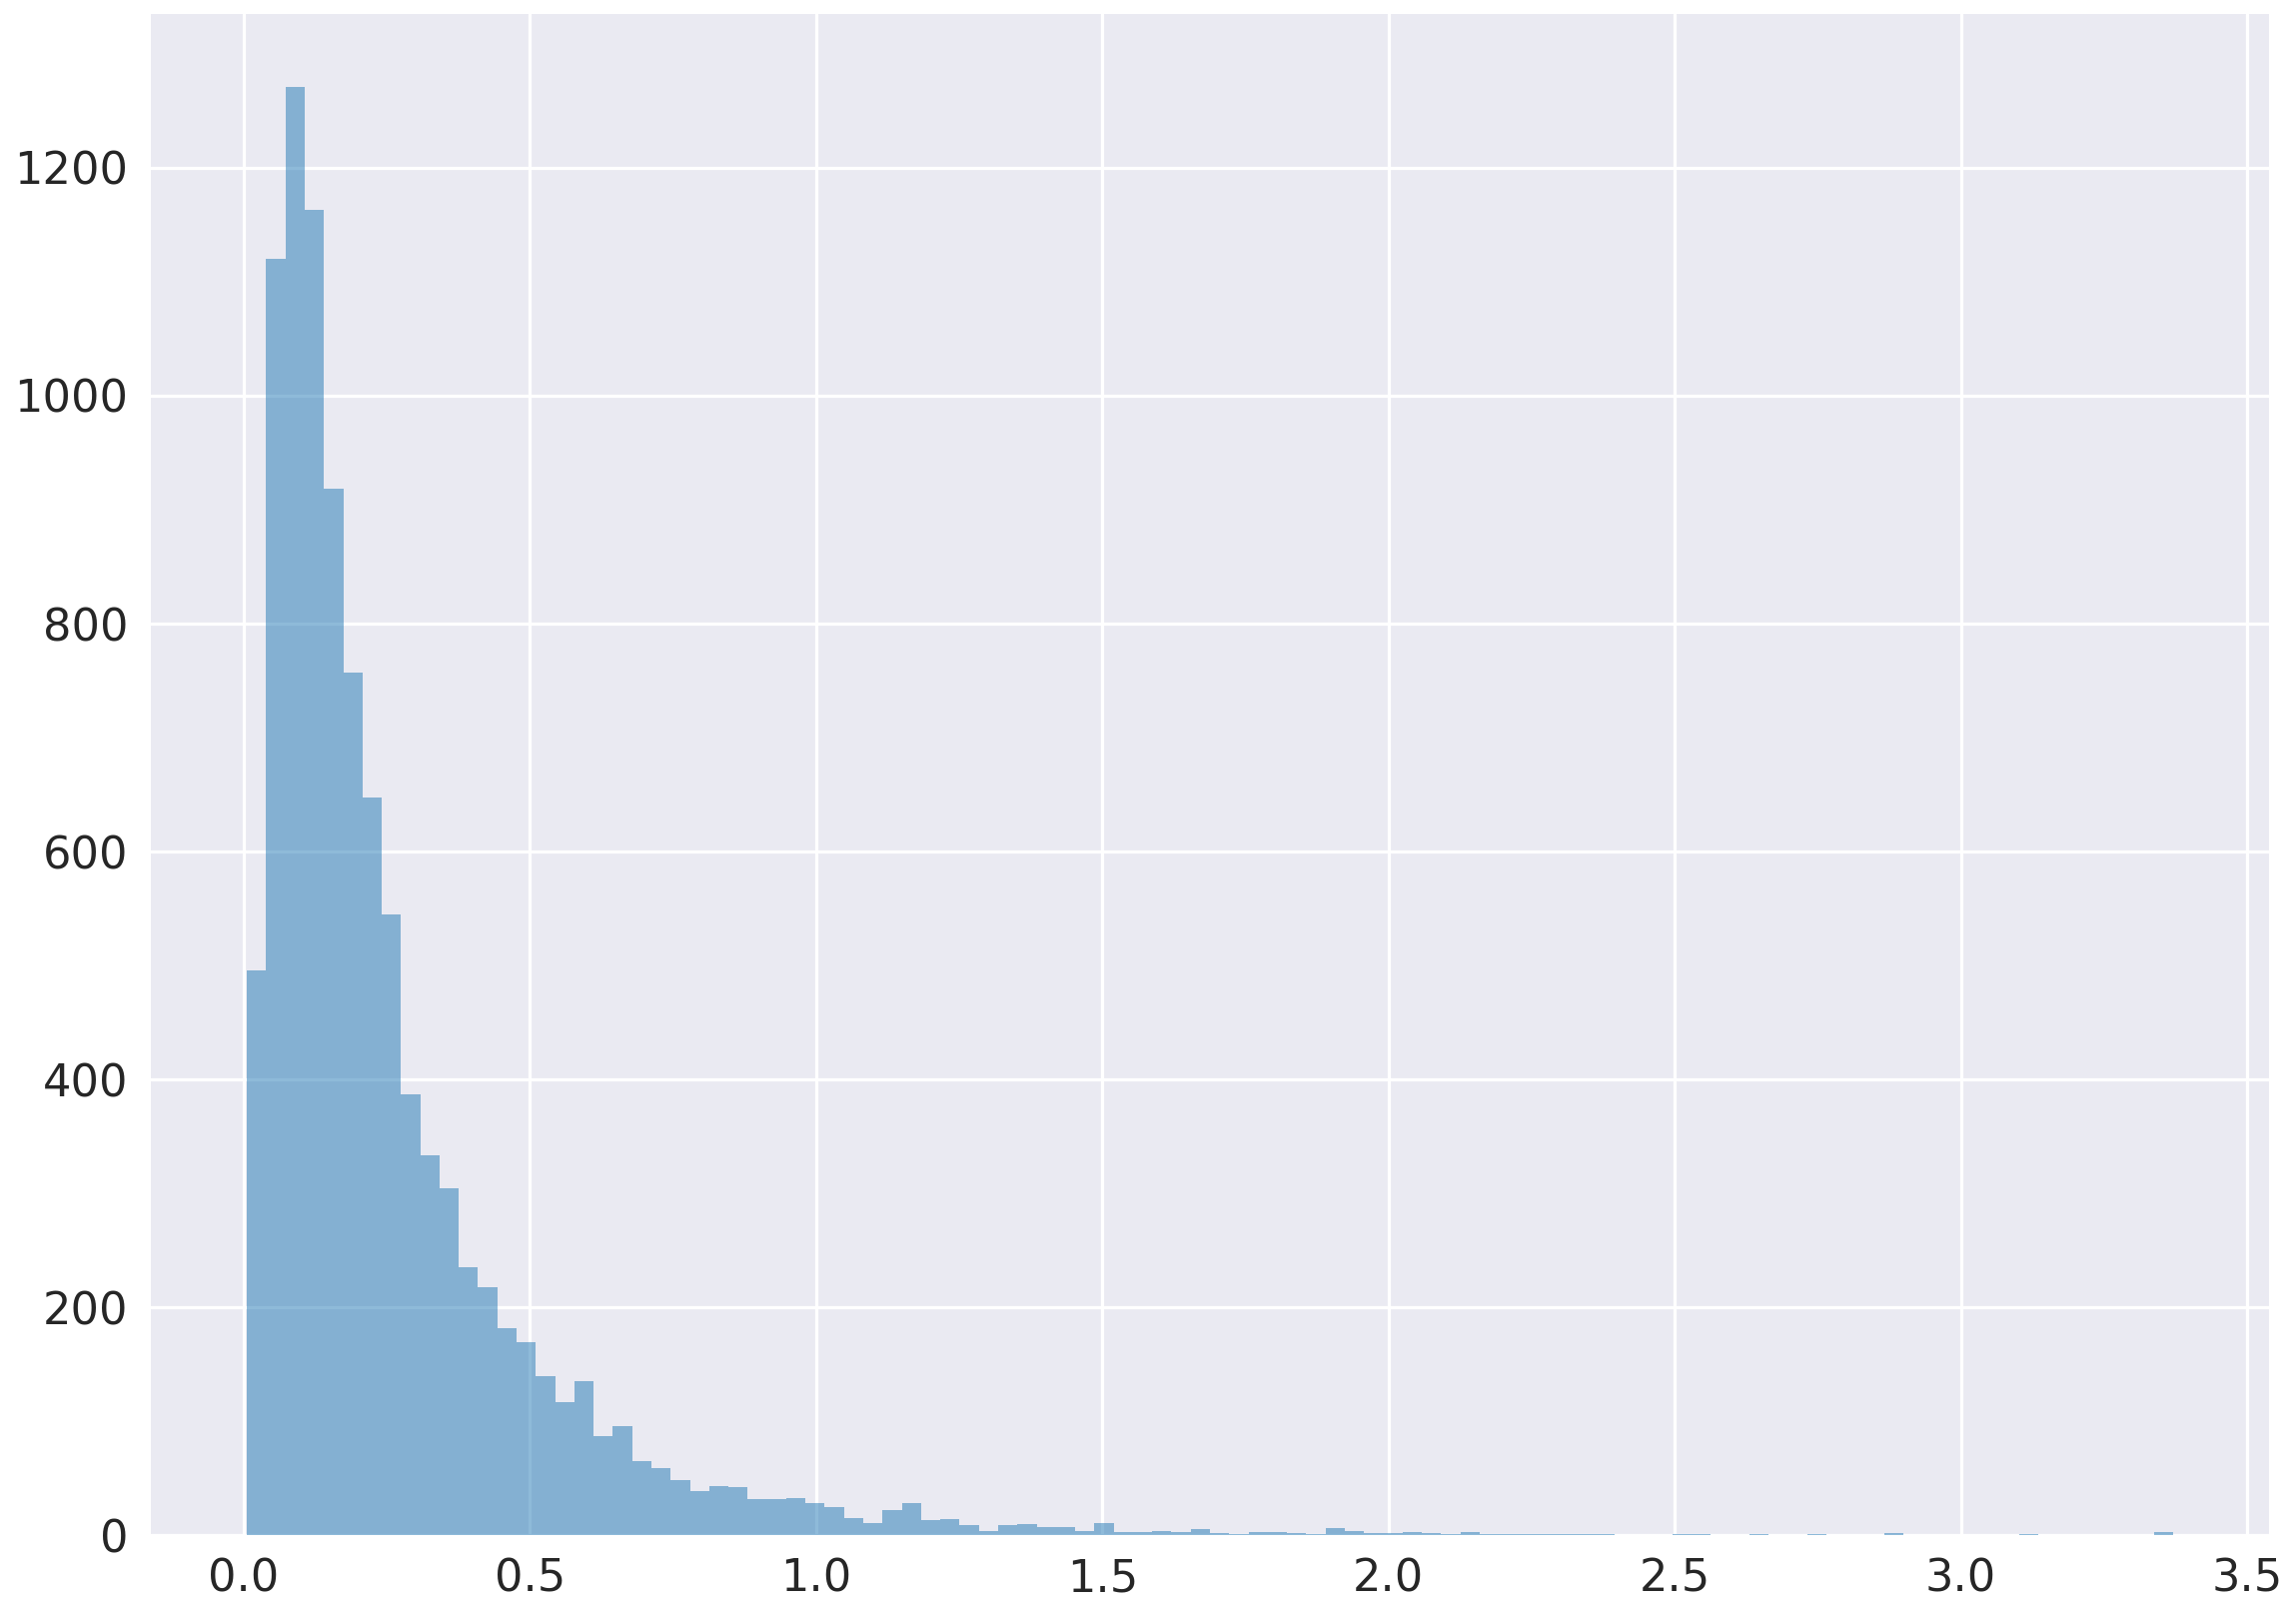

In [33]:
plt.hist(seeings_traces,bins=100, alpha=0.5);

In [34]:
np.mean(seeings_traces)

0.264294172226961

In [36]:
np.mean(seeings_traces)/np.mean(traces)

2.8933775060156068